In [2]:
import numpy as np
import pandas as pd
from pyntcloud import PyntCloud
import os
import pickle
import torch
import matplotlib.pyplot as plt
import importlib
import cv2 as cv

In [3]:
from skimage import io
from skimage.transform import resize

In [6]:
import predict_depth

In [155]:
importlib.reload(demo)

<module 'demo' from '/Users/Hallee/Desktop/gumgum/MegaDepth/demo.py'>

In [167]:
points = pickle.load(open( "./output/concert2_depth.p", "rb" ) )
pred_depth = points.data.cpu().numpy() 
# 1280 by 720
type(points)

torch.Tensor

In [168]:
pred_inv_depth = 1/points
pred_inv_depth = pred_inv_depth.data.cpu().numpy()

In [170]:
pred_inv_depth == 1/pred_depth

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [173]:
d = rescale_depth(pred_depth, 0, 1)
resize(d, (500,500), anti_aliasing=True, mode='reflect')

array([[0.27658887, 0.29522012, 0.31856814, ..., 0.21662971, 0.19114147,
        0.17913399],
       [0.34794878, 0.35342292, 0.37270914, ..., 0.24097772, 0.21510482,
        0.21184079],
       [0.29110865, 0.28624684, 0.29505256, ..., 0.22436255, 0.20811561,
        0.20772872],
       ...,
       [0.00770591, 0.00739067, 0.00717686, ..., 0.01318029, 0.01333511,
        0.01346984],
       [0.00884967, 0.00794807, 0.00746129, ..., 0.0135172 , 0.01360804,
        0.01372827],
       [0.01395313, 0.01007728, 0.00753495, ..., 0.01307311, 0.01536718,
        0.01879894]])

In [179]:
resize_depth(pred_depth, 720, 1280)

<class 'numpy.ndarray'>
<class 'function'>


array([[1.56577087, 1.57400405, 1.63986951, ..., 1.12255449, 1.0806284 ,
        1.07538764],
       [1.50227758, 1.51193636, 1.58920657, ..., 1.10341069, 1.05377134,
        1.04756642],
       [1.62926415, 1.63607174, 1.69053246, ..., 1.14169829, 1.10748546,
        1.10320886],
       ...,
       [0.27700991, 0.27567545, 0.26499978, ..., 0.29020361, 0.29813415,
        0.29912547],
       [0.28494656, 0.28295199, 0.26699544, ..., 0.29133341, 0.30518725,
        0.30691898],
       [0.28097824, 0.27931372, 0.26599761, ..., 0.29076851, 0.3016607 ,
        0.30302222]])

In [118]:
demo.rescale_depth(pred_depth, min_depth, max_depth)

array([[1.3429209 , 1.4866644 , 1.5959868 , ..., 1.2158701 , 1.0438594 ,
        0.9511817 ],
       [1.6592975 , 1.7042519 , 1.8592273 , ..., 1.3558645 , 1.1211642 ,
        1.0952997 ],
       [1.4304546 , 1.3901683 , 1.5075406 , ..., 1.2411902 , 1.0828487 ,
        1.0816936 ],
       ...,
       [0.26104456, 0.25843602, 0.25845748, ..., 0.28258982, 0.28323781,
        0.28437296],
       [0.26617765, 0.2591188 , 0.26011664, ..., 0.28432545, 0.2844306 ,
        0.28534254],
       [0.28984725, 0.25991657, 0.25964817, ..., 0.28211367, 0.2827646 ,
        0.30933073]], dtype=float32)

In [88]:
resized_pred_depth.shape

(512, 384)

In [2]:
im = cv.imread("Picture1.png")

In [14]:
im

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[201, 201, 201],
        [201, 201, 201],
        [201, 201, 201],
        ...,
        [221, 221, 221],
        [219, 219, 219],
        [217, 217, 217]],

       [[201, 201, 201],
        [201, 201, 201],
        [201, 201, 201],
        ...,
        [221, 221, 221],
        [220, 220, 220],
        [218, 218, 218]],

       [[192, 192, 192],
        [195, 195, 195],
        [200, 200, 200],
        ...,
        [223, 223, 223],
        [218, 218, 218],
        [211, 211, 211]]

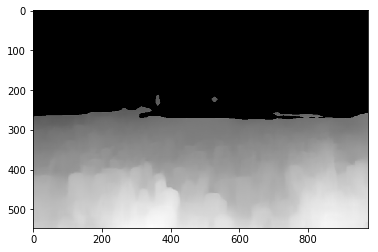

In [7]:
plt.imshow(im, aspect='auto')

In [58]:
demo.resize_depth(im, 400, 500).shape

/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(547, 974, 3)

In [61]:
pred_depth = im
max_depth = np.amax(pred_depth)
max_depth

253

In [63]:
scaled_depth = pred_depth/max_depth
scaled_depth.shape

(547, 974, 3)

In [65]:
resized_depth = resize(scaled_depth, (720, 1280))


/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [81]:
(max_depth*resized_depth).shape

(720, 1280, 3)

In [83]:
demo.resize_depth(im, 720, 1280).shape

/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/Hallee/anaconda/envs/gumgum/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(547, 974, 3)

(array([23330., 45655., 53019., 41917., 59793., 43578.,  6896.,   318.,
          258.,   565.]),
 array([  2. ,  27.2,  52.4,  77.6, 102.8, 128. , 153.2, 178.4, 203.6,
        228.8, 254. ]),
 <a list of 10 Patch objects>)

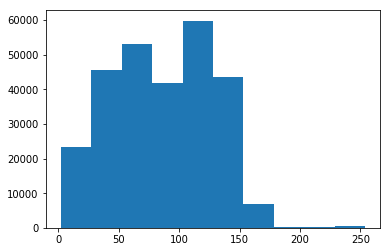

In [99]:
im = cv.imread("Picture1.png")

# make image black and white
im = cv.cvtColor(im,cv.COLOR_BGR2GRAY)
im = im.astype(float)
points = demo.convert_array_to_points(im)

# remove masked part
points = points[points[:,2] != 0.,:]
points[:,2] = 255-points[:,2]

# save points
demo.save_points(points, "concert_mask")

plt.hist(points[:,2])

In [100]:
# convert inverse depth to depth
#max_depth = np.max(points[:,2])
#min_depth = np.min(points[:,2])
#points[:,2] = 500*(points[:,2]-min_depth)/max_depth



Saving depth map coordinates to... ./images/concert_mask_depth.txt


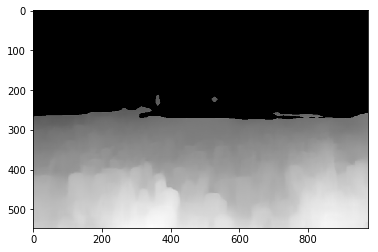

In [6]:
plt.imshow(im, aspect='auto')

In [90]:
points[:,2]

array([13.15876153,  3.10499809, 41.49209486, ...,  0.13559262,
        0.16181963,  0.20062567])

(array([2.75021e+05, 2.36000e+02, 1.30000e+01, 1.00000e+01, 1.50000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.40000e+01]),
 array([  0.        ,  25.39920949,  50.79841897,  76.19762846,
        101.59683794, 126.99604743, 152.39525692, 177.7944664 ,
        203.19367589, 228.59288538, 253.99209486]),
 <a list of 10 Patch objects>)

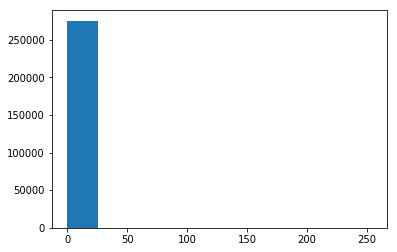

In [91]:
plt.hist(points[:,2],bins=10)

In [82]:
min_depth

0.003952569169960474

In [ ]:

    new_depth_map = new_max_depth*(pred_depth-min_depth)/max_depth
    return(new_depth_map)

(array([2.75295e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.40000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

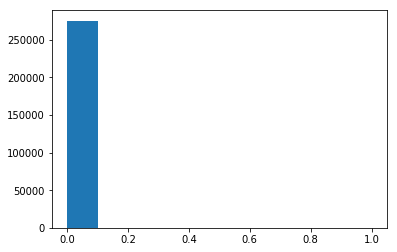

In [61]:
plt.hist(points[:,2])

(array([601996.,  80095.,  26897.,  38482.,  53271.,  70205.,  41596.,
          7442.,    846.,    770.]),
 array([3.92761482e-07, 8.56933882e-02, 1.71386384e-01, 2.57079379e-01,
        3.42772374e-01, 4.28465370e-01, 5.14158365e-01, 5.99851361e-01,
        6.85544356e-01, 7.71237351e-01, 8.56930347e-01]),
 <a list of 10 Patch objects>)

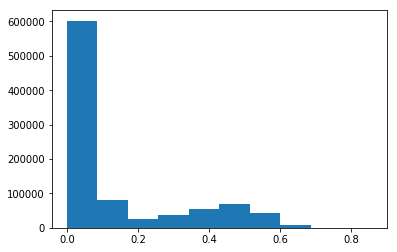

In [21]:
plt.hist(points[:,2])

(array([7.45340e+04, 1.44681e+05, 1.49433e+05, 6.22200e+04, 4.27160e+04,
        3.11990e+04, 4.08850e+04, 3.08760e+04, 1.68920e+04, 8.56000e+03,
        7.57100e+03, 1.12040e+04, 1.24130e+04, 1.31290e+04, 1.14270e+04,
        8.91600e+03, 6.32100e+03, 4.73000e+03, 2.48400e+03, 1.90000e+03,
        1.66000e+03, 3.06100e+03, 1.62400e+03, 2.04300e+03, 3.15500e+03,
        3.50400e+03, 2.74900e+03, 2.94700e+03, 3.19300e+03, 2.96100e+03,
        3.54500e+03, 3.81600e+03, 4.05000e+03, 4.37400e+03, 3.85400e+03,
        3.45700e+03, 3.43500e+03, 3.44200e+03, 4.09900e+03, 4.41000e+03,
        4.60400e+03, 4.22400e+03, 4.68100e+03, 4.76300e+03, 5.76000e+03,
        5.34400e+03, 6.11600e+03, 5.55400e+03, 6.18800e+03, 6.03700e+03,
        5.98400e+03, 5.55700e+03, 5.98800e+03, 7.75500e+03, 8.15200e+03,
        8.30500e+03, 7.97400e+03, 6.99100e+03, 6.99300e+03, 6.50600e+03,
        7.20800e+03, 6.26400e+03, 6.10400e+03, 4.90300e+03, 4.15400e+03,
        3.69500e+03, 3.23100e+03, 2.66700e+03, 1.92

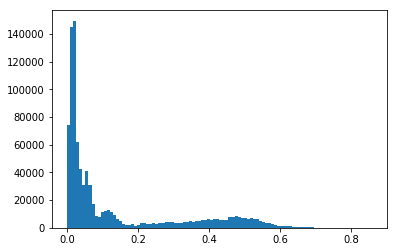

In [5]:
plt.hist(resized_pred_depth.flatten(), bins=100)

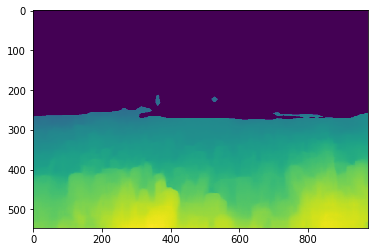

In [67]:
plt.imshow(im, aspect='auto')

In [60]:
points = demo.convert_array_to_points(resized_pred_depth)
demo.save_points(points, "concert")

Saving depth map coordinates to... ./images/concert_depth.txt


In [49]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./images/concert2.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

In [73]:
cv.THRESH_BINARY_INV

1

In [74]:
cv.THRESH_OTSU

8

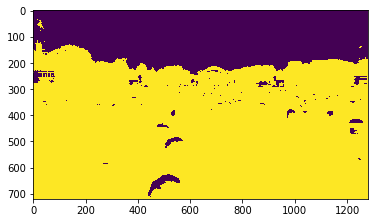

In [76]:
plt.imshow(thresh)

In [156]:
#pred_depth = thresh * (resized_pred_depth/255)
#max_depth = np.amax(pred_depth)
#min_depth = np.amin(pred_depth)
#pred_depth = 255*(pred_depth-min_depth)/max_depth
rescaled_pred_depth = demo.rescale_depth(resized_pred_depth, 255)
cutoff = np.percentile(rescaled_pred_depth.flatten(), 75)
#blur = cv.bilateralFilter(rescaled_pred_depth.astype(np.uint8),5,150,150)
points = demo.convert_array_to_points(rescaled_pred_depth)
points = points[points[:,2] != 0.,:]
points = points[points[:,2] <= cutoff,:]

demo.save_points(points, "concert")

Saving depth map coordinates to... ./images/concert_depth.txt


In [155]:
rescaled_pred_depth = demo.rescale_depth(resized_pred_depth, 255)
points = demo.convert_array_to_points(rescaled_pred_depth)
demo.save_points(points, "concert2")

Saving depth map coordinates to... ./images/concert2_depth.txt


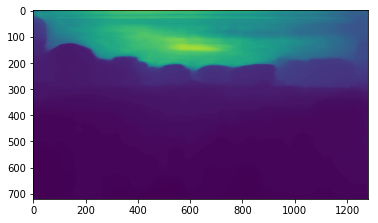

In [151]:
blur = cv.bilateralFilter(rescaled_pred_depth.astype(np.uint8),5,100,100)
plt.imshow(blur)

In [152]:
blur

array([[70, 76, 83, ..., 52, 48, 44],
       [74, 80, 86, ..., 54, 50, 47],
       [77, 82, 88, ..., 57, 53, 50],
       ...,
       [ 2,  2,  2, ...,  3,  3,  3],
       [ 2,  2,  2, ...,  3,  3,  3],
       [ 2,  2,  2, ...,  3,  3,  3]], dtype=uint8)

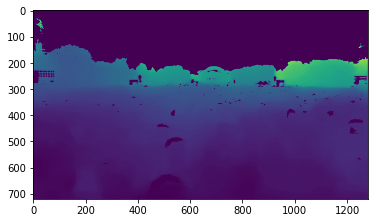

In [116]:
blur = cv.bilateralFilter(pred_depth.astype(np.uint8),5,150,150)
plt.imshow(blur)

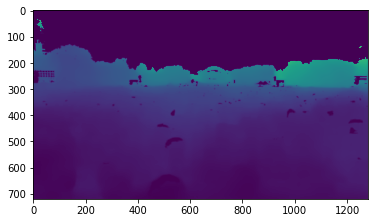

In [86]:
points.shape

(2160000, 3)

In [85]:
np.arange(2,points.shape[0]+2).shape

(2160000,)

In [89]:
points = np.insert(points, 0, np.arange(2,points.shape[0]+2), axis=1)

In [90]:
points.shape

(2160000, 4)

In [105]:
np.savetxt("./test.txt", points[200:210,], fmt=['%10d','%10d','%10d','%10f'], header = "0 "+str(points.shape[0]))

In [25]:
#points.to_csv("./images/redsoxfans_xyz.csv")

In [54]:
points['z']

0          0.089695
1          0.089695
2          0.105579
3          0.102701
4          0.099823
5          0.096945
6          0.094067
7          0.091806
8          0.090245
9          0.089695
10         0.089695
11         0.089695
12         0.089695
13         0.089695
14         0.089695
15         0.089695
16         0.089695
17         0.089695
18         0.089695
19         0.089695
20         0.089695
21         0.089695
22         0.089695
23         0.089695
24         0.089695
25         0.089695
26         0.089695
27         0.089695
28         0.089695
29         0.089695
             ...   
2159970    0.580275
2159971    0.579289
2159972    0.578304
2159973    0.577318
2159974    0.576338
2159975    0.575371
2159976    0.574404
2159977    0.573437
2159978    0.572470
2159979    0.572426
2159980    0.573014
2159981    0.573601
2159982    0.574189
2159983    0.574776
2159984    0.572375
2159985    0.569664
2159986    0.566953
2159987    0.564243
2159988    0.561922


In [19]:
cloud = PyntCloud(points)

## Loading Text File

In [180]:
points = np.loadtxt("./output/concert2_depth.txt", skiprows=1)
points.shape[0]

921600

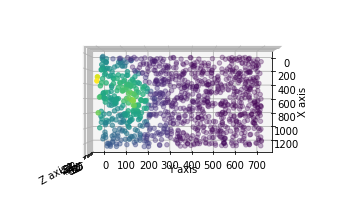

In [184]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d', aspect='equal')
ax.view_init(90, angle)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
idx = np.random.randint(points.shape[0], size=1000)
ax.scatter3D(points[idx,0],points[idx,1], points[idx,2], c=points[idx,2]);

In [11]:
512*384

196608

In [13]:
import pickle

In [15]:
points = pickle.load(open( "save.p", "rb" ) )

In [18]:
type(points)
points.shape

(512, 384)

(512, 384)

In [ ]:
np.savetxt()

## Segment Image 

In [ ]:
255,149,1

In [210]:
import scipy.stats as stats

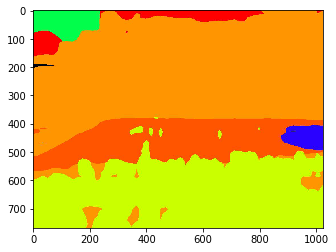

In [11]:
# opencv stores colors as bgr by default
im = cv.imread("/Users/Hallee/Desktop/michigan_seg.jpg")
plt.imshow(im[:,:,::-1])

In [12]:
im.shape

(768, 1024, 3)

In [87]:
bgr = [1,149,255]
margin = 20
lower = np.array([np.clip(a-margin,0,255) for a in bgr])
upper = np.array([np.clip(a+margin,0,255) for a in bgr])
#mask = np.zeros((im.shape[0],im.shape[1]), dtype=int)
mask = cv.inRange(im, lower, upper)
#mask = np.where(np.all(, axis=2),1,0)
points = predict_depth.convert_array_to_points(mask)
mask_points = points[np.where(points[:,2] == 255), :2]

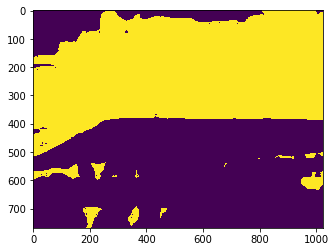

In [74]:
plt.imshow(mask)

In [92]:
mask_points[0]

array([[805,   0],
       [806,   0],
       [807,   0],
       ...,
       [203, 767],
       [204, 767],
       [205, 767]])

In [84]:
np.unique(points[:,2])

array([  0, 255])

In [88]:
np.where(points[:,2] == 255)

(array([   805,    806,    807, ..., 785611, 785612, 785613]),)

In [66]:
np.all(im > bgr, axis=2)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [70]:
[1,-1,1] [0,0,0]

True

In [51]:
np.unique(mask, return_counts=True)

(array([0, 1]), array([436985, 349447]))

In [58]:
points

array([[   0,    0,    0],
       [   1,    0,    0],
       [   2,    0,    0],
       ...,
       [1021,  767,    0],
       [1022,  767,    0],
       [1023,  767,    0]])

In [49]:
mask_points.shape

(277, 2)

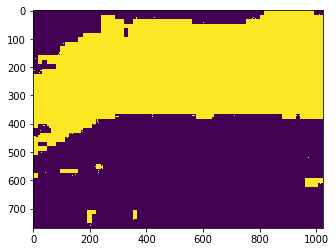

In [31]:
plt.imshow(mask)

In [24]:
bgr = [1,149,255]

(768, 1024, 3)

In [45]:
mask[295,0]

1

In [43]:
points = predict_depth.convert_array_to_points(mask)
points[np.where(points[:,2] == 1),:2][0]

array([[816,   0],
       [817,   0],
       [818,   0],
       ...,
       [190, 763],
       [194, 763],
       [194, 764]])

In [44]:
points[np.where(points[:,2] == 1),:2][0].shape

(349447, 2)

In [287]:
mask_points = points[np.where(mask[:,2] == 1), 0:2][0]

In [288]:
mask_points.shape

(277, 2)

In [276]:
mask[:,2].index(1)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [200]:
lst = np.resize(im, (int(im.size/3), 3))

In [233]:
vals,freq = np.unique(lst, axis=0, return_counts=True)

In [234]:
vals

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   3],
       ...,
       [255,  32,  69],
       [255, 170, 207],
       [255, 237, 242]], dtype=uint8)

In [225]:
np.unique(np.all(lst == [1,149,255], axis=1), return_counts=True)

(array([False,  True]), array([436985, 349447]))